# Практическое задание 1. Моделирование пучка с заданным распределением интенсивности
### Постановка задачи
Разработать  приложение,  генерирующее  случайные  начальные  координаты  фотона  в 
осесимметричном  пучке,  радиальное  распределение  интенсивности  которого  описывается 
следующей функцией:
$$p(r)=const$$
$$r \in [\alpha_1, \alpha_2]$$
Входные параметры приложения: 
- количество фотонов $N$
- внутренний и внешний радиусы пучка $\alpha_1$ и $\alpha_2$

Выходные параметры:  
- распределение $N$ случайных положений фотона в плоскости $XY$ начала пучка,  
- осевое сечение плотности распределения точек в сравнении с аналитической кривой.

### Решение
$$\int\limits_{-\infty}^{\infty}p(r)dr=const \int\limits_{\alpha_1}^{\alpha_2}dr=const(\alpha_2-\alpha_1)\newline$$
В результате нормировки получаем:
$$f_\xi(r)=\frac{1}{const(\alpha_2-\alpha_1)}
\begin{cases}
    const ,      & \quad  r \in [\alpha_1, \alpha_2]\\
    0 ,  & \quad r \notin [\alpha_1, \alpha_2]
  \end{cases}
\newline  
$$
$$f_\xi(r)=
\begin{cases}
    \frac{1}{\alpha_2-\alpha_1} ,      & \quad  r \in [\alpha_1, \alpha_2]\\
    0 ,  & \quad r \notin [\alpha_1, \alpha_2]
  \end{cases}
\newline  
$$
$$
F_\xi(r)=
\begin{cases}
    0 , & \quad r<\alpha_1 \\
    \frac{r-\alpha_1}{\alpha_2-\alpha_1} ,      & \quad  \alpha_1 \leq r \leq \alpha_2\\
    1 ,  & \quad  r > \alpha_2
  \end{cases}
$$
Выразим радиус через значение функции распределения:
$$r=\alpha_1+F_\xi(\alpha_2-\alpha_1)$$
Для моделирования случайной величины с заданной плотностью распределения будем брать равномерно распределенную на отрезке $[0,1]$ случайную величину за значение $F_\xi$.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

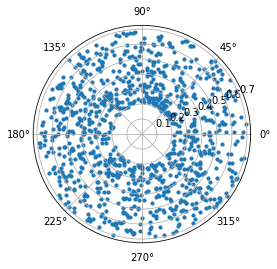

In [45]:
N = 1000   # Количество фотонов
a1 = 0.2   # Внутренний радиус пучка
a2 = 0.7     # Внешний радиус пучка

def F(r):  # Функция распределения
    if r < a1:
        return 0.
    elif r <= a2:
        return (r - a1)/(a2 - a1)
    else:
        return 1.
    
def f(r):  # Плотность распределения
    if a1 <= r <= a2:
        return 1./(a2-a1)
    else: 
        return 0.

def get_r(): # Радиус, выраженный через значение функции распределения
    return (a1 + (a2 - a1)*np.random.uniform(0, 1))
    

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
phis = 2 * np.pi * np.random.rand(N)
rhos = []
for i in range(N):
    rhos.append(get_r())
ax.scatter(phis, rhos, s=10)
plt.show()


Получили распределение фотонов.

Теперь построим гистограмму, для этого используем функцию из библиотеки seaborn с нормировкой, при которой общая площадь гистограммы равна единице.

<AxesSubplot:ylabel='Density'>

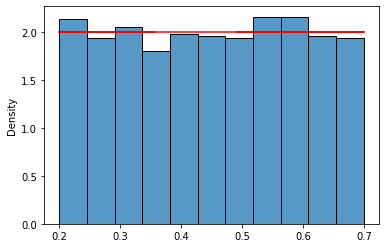

In [46]:
dens = [f(rhos[i]) for i in range(N)]
plt.plot(rhos,dens,c="red")
sns.histplot(rhos, stat="density")